# Spotify API: posting clusters as playlists

---
##1.&nbsp; Import libraries and files 💾

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
url = "https://drive.google.com/file/d/1oYQSNxfvw6kFr6-N9rKLRAnLXlp0osEt/view?usp=drive_link"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
original_songs_df = pd.read_csv(path)

# create a copy
songs_df = original_songs_df.copy()

# data cleaning
songs_df.columns = songs_df.columns.str.strip()
songs_df = songs_df.drop(["type", "Unnamed: 0"], axis=1)

songs_df.head()

name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                             0.658  0.2590   
1  Antônio Carlos Jobim                                     0.742  0.3990   
2  Martinho Da Vila                                         0.851  0.7300   
3  Chico César                                              0.705  0.0502   
4  Kurt Elling                                              0.651  0.1190   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0   11   -13.141     0       0.0705         0.694          0.000059     0.975   
1    2   -12.646     1       0.0346         0.217          0.000002     0.107   
2    2   -11.048     1       0.3470         0.453          0.000063     0.124   
3    4   -18.115     1       0.0471         0.879          0.000041     0.386   
4    6   -19.807     1       0.0380         0.916          0.000343     0.104   

   valence    tempo  duration_ms  time_signature                       id  \
0    0.306  110.376       256213               4  1n7JnwviZ7zf0LR1tcGFq7    
1    0.693  125.039       191867               4  5QGM1U0eCYrQuwSJwTm5Zq    
2    0.905   93.698       152267               4  0NLIFSZxPzQhCwnkn5PJYs    
3    0.524  106.802       186227               4  3mXqOdlLE1k67WsAxryPFs    
4    0.402  120.941       273680               4  7bSzjzjTkWT2CkIPPdp0eA    

                                                html  
0  https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1  https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2  https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3  https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4  https://open.spotify.com/track/7bSzjzjTkWT2CkI...

---
##2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus.

In [ ]:
# These are features to scale
to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

# Now I take the columns I wish to scale, fit and transform them, and inject them back into my dataframe
songs_df[to_scale] = MinMaxScaler().fit_transform(songs_df[to_scale])

songs_df.head()

name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                          0.680455  0.2590   
1  Antônio Carlos Jobim                                  0.767322  0.3990   
2  Martinho Da Vila                                      0.880041  0.7300   
3  Chico César                                           0.729059  0.0502   
4  Kurt Elling                                           0.673216  0.1190   

        key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  1.000000  0.763897   0.0     0.076797      0.696787          0.000060   
1  0.181818  0.771967   1.0     0.037691      0.217871          0.000002   
2  0.181818  0.798018   1.0     0.377996      0.454819          0.000064   
3  0.363636  0.682811   1.0     0.051307      0.882530          0.000041   
4  0.545455  0.655228   1.0     0.041394      0.919679          0.000348   

   liveness   valence     tempo  duration_ms  time_signature  \
0  0.987842  0.310660  0.515800     0.059067             0.8   
1  0.108409  0.703553  0.584322     0.042058             0.8   
2  0.125633  0.918782  0.437862     0.031590             0.8   
3  0.391084  0.531980  0.499098     0.040567             0.8   
4  0.105370  0.408122  0.565171     0.063684             0.8   

                        id                                               html  
0  1n7JnwviZ7zf0LR1tcGFq7   https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1  5QGM1U0eCYrQuwSJwTm5Zq   https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2  0NLIFSZxPzQhCwnkn5PJYs   https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3  3mXqOdlLE1k67WsAxryPFs   https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4  7bSzjzjTkWT2CkIPPdp0eA   https://open.spotify.com/track/7bSzjzjTkWT2CkI...

---
##3.&nbsp; Cluster

In [ ]:
# Initialise the model
n_clusters = 25
my_kmeans = KMeans(n_clusters=n_clusters,
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(songs_df[to_scale])

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
songs_df["cluster"] = clusters

songs_df.head()

name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                          0.680455  0.2590   
1  Antônio Carlos Jobim                                  0.767322  0.3990   
2  Martinho Da Vila                                      0.880041  0.7300   
3  Chico César                                           0.729059  0.0502   
4  Kurt Elling                                           0.673216  0.1190   

        key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  1.000000  0.763897   0.0     0.076797      0.696787          0.000060   
1  0.181818  0.771967   1.0     0.037691      0.217871          0.000002   
2  0.181818  0.798018   1.0     0.377996      0.454819          0.000064   
3  0.363636  0.682811   1.0     0.051307      0.882530          0.000041   
4  0.545455  0.655228   1.0     0.041394      0.919679          0.000348   

   liveness   valence     tempo  duration_ms  time_signature  \
0  0.987842  0.310660  0.515800     0.059067             0.8   
1  0.108409  0.703553  0.584322     0.042058             0.8   
2  0.125633  0.918782  0.437862     0.031590             0.8   
3  0.391084  0.531980  0.499098     0.040567             0.8   
4  0.105370  0.408122  0.565171     0.063684             0.8   

                        id                                               html  \
0  1n7JnwviZ7zf0LR1tcGFq7   https://open.spotify.com/track/1n7JnwviZ7zf0LR...   
1  5QGM1U0eCYrQuwSJwTm5Zq   https://open.spotify.com/track/5QGM1U0eCYrQuwS...   
2  0NLIFSZxPzQhCwnkn5PJYs   https://open.spotify.com/track/0NLIFSZxPzQhCwn...   
3  3mXqOdlLE1k67WsAxryPFs   https://open.spotify.com/track/3mXqOdlLE1k67Ws...   
4  7bSzjzjTkWT2CkIPPdp0eA   https://open.spotify.com/track/7bSzjzjTkWT2CkI...   

   cluster  
0       15  
1        7  
2        7  
3       10  
4       10

---
##4.&nbsp; Spotify Playlists

###4.1.&nbsp; Getting Started with Spotify

First, navigate to [Spotify's Developer Website](https://developer.spotify.com/), register, and click the `Create app` button. Give your app a name and brief description, and enter a Redirect URI.

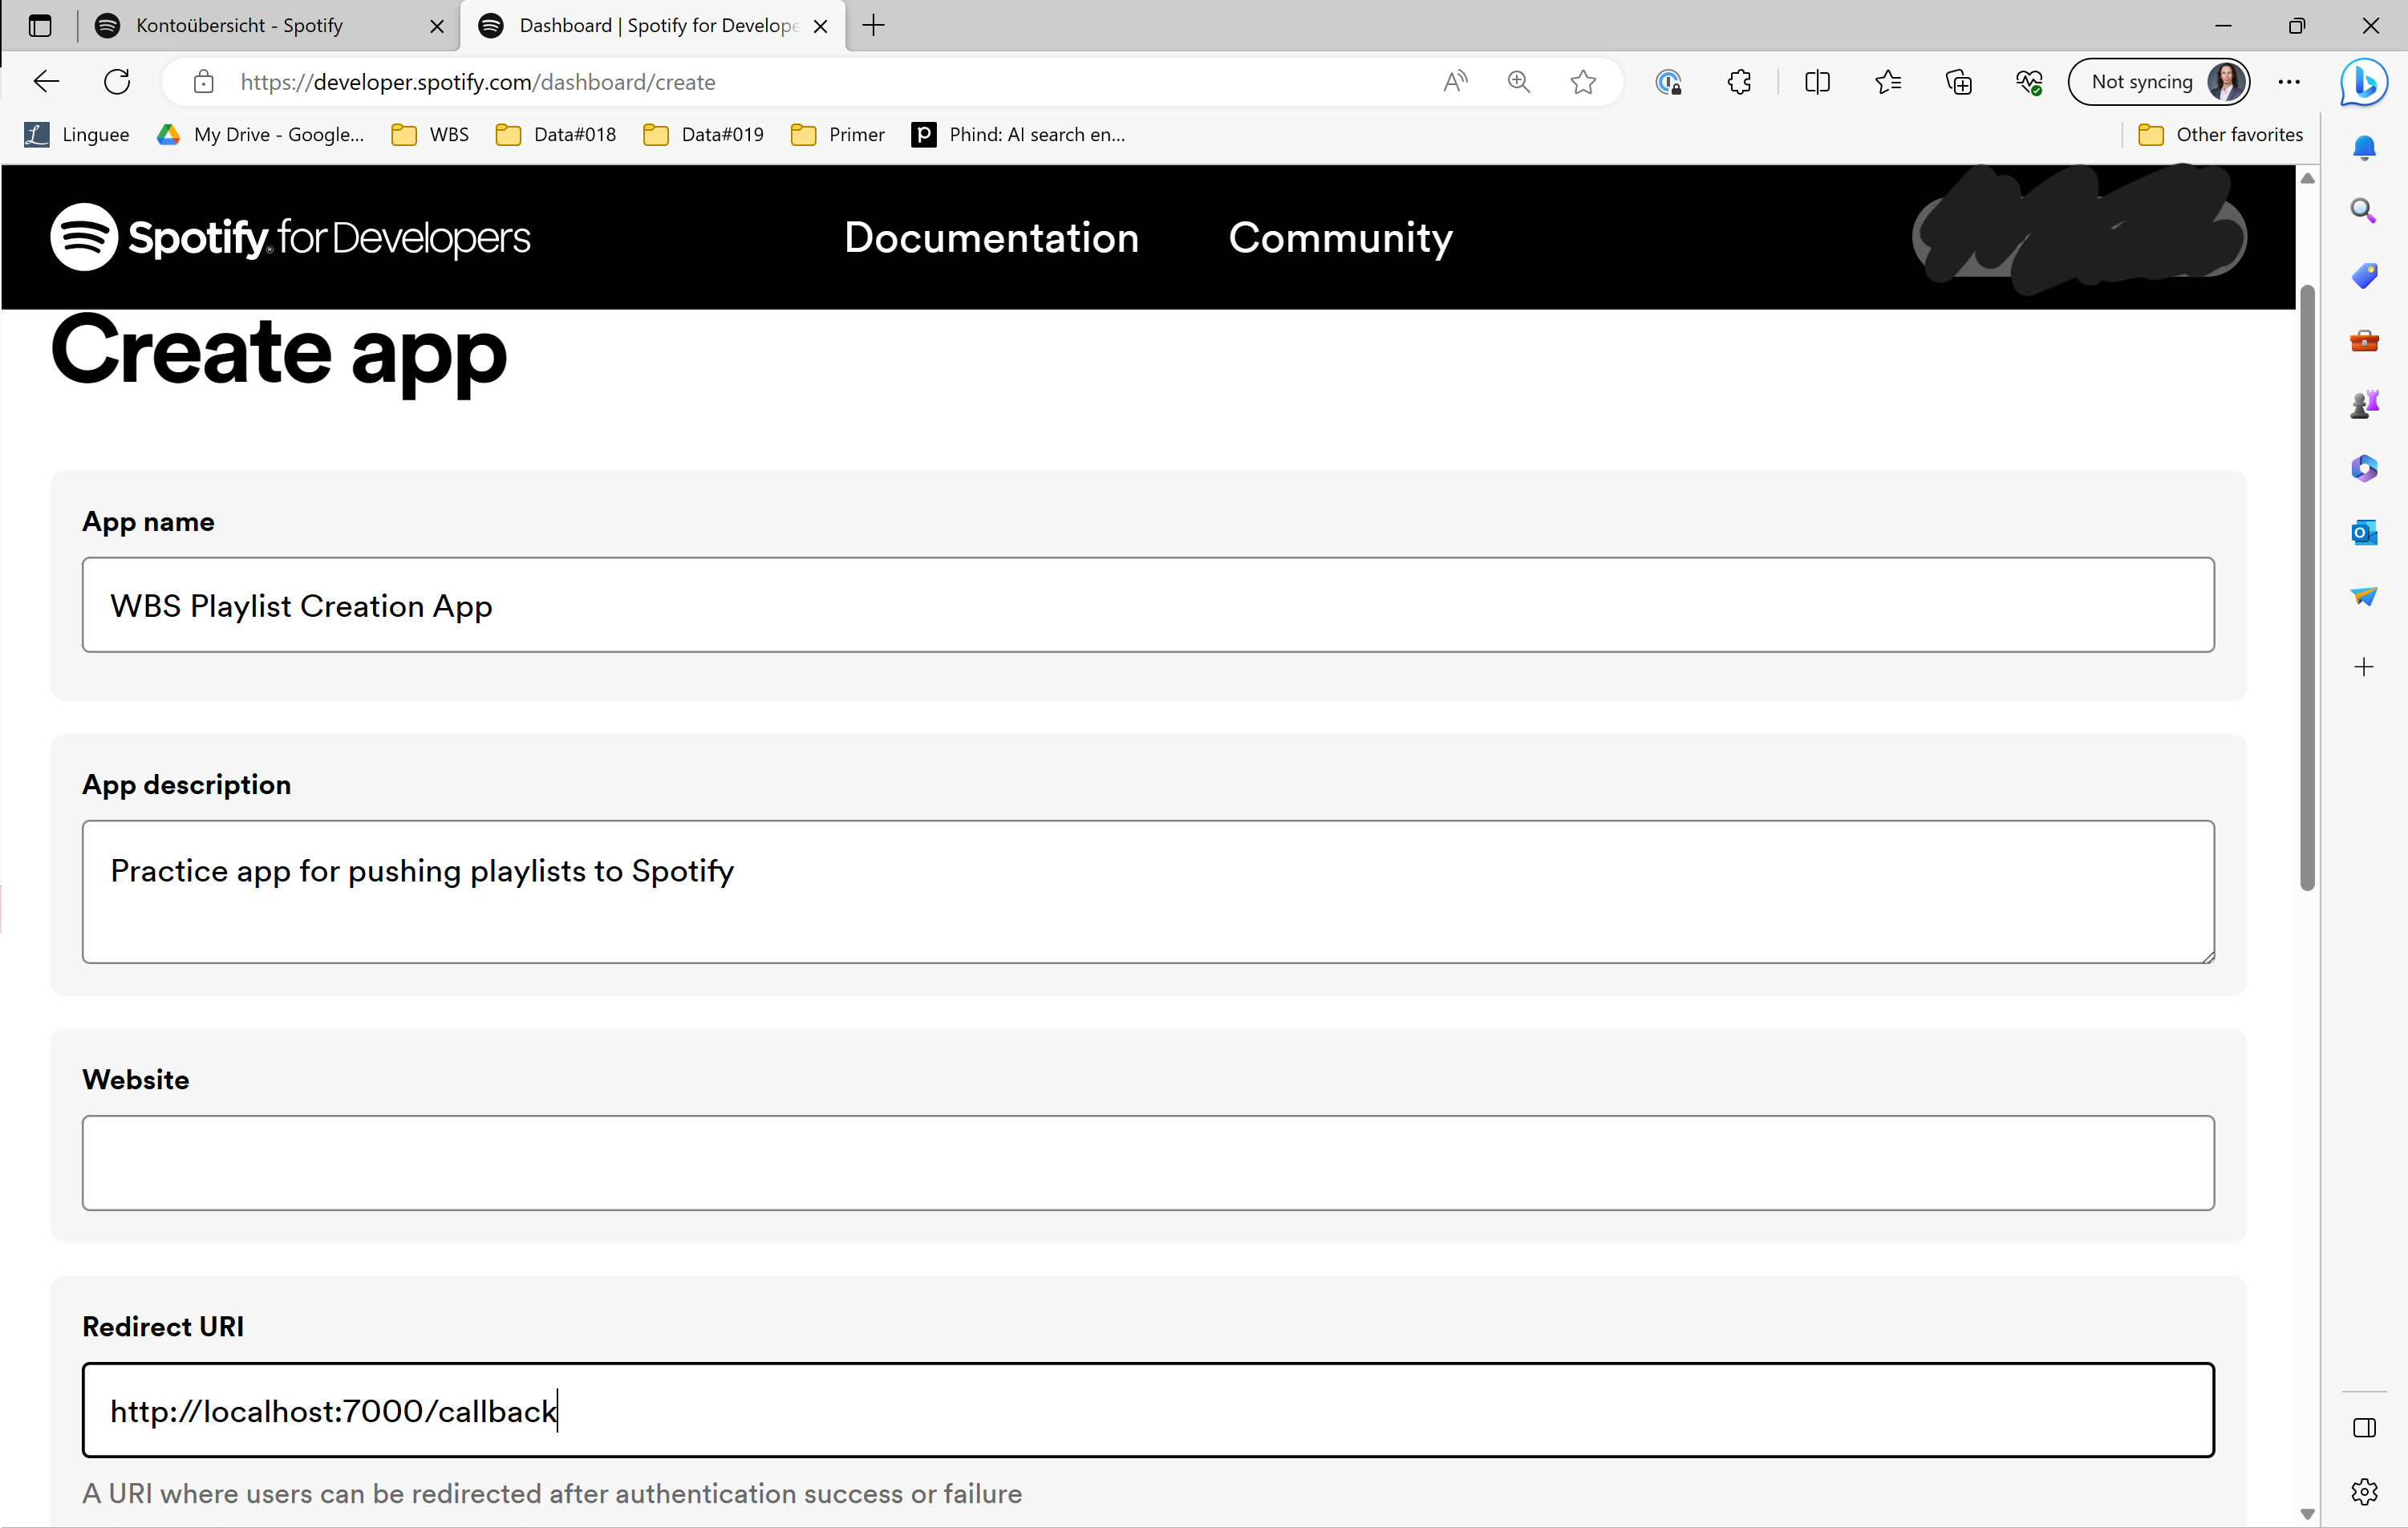

For Google Colab we set the RedirectURL to http://localhost:8081/

Otherwise, you may need to try multiple redirect URIs before finding one that works. Other options include localhost:8000 and localhost:8888.
> **The important thing is that the host you specify in the Spotify dashboard matches the host in the code below.**

After agreeing to the terms and conditions, you can move on.

###4.2.&nbsp; Getting the Client ID and Client Secret

From the dashboard of your new app, navigate to Settings and copy the Client ID and Client Secret (which is still hidden in this image).

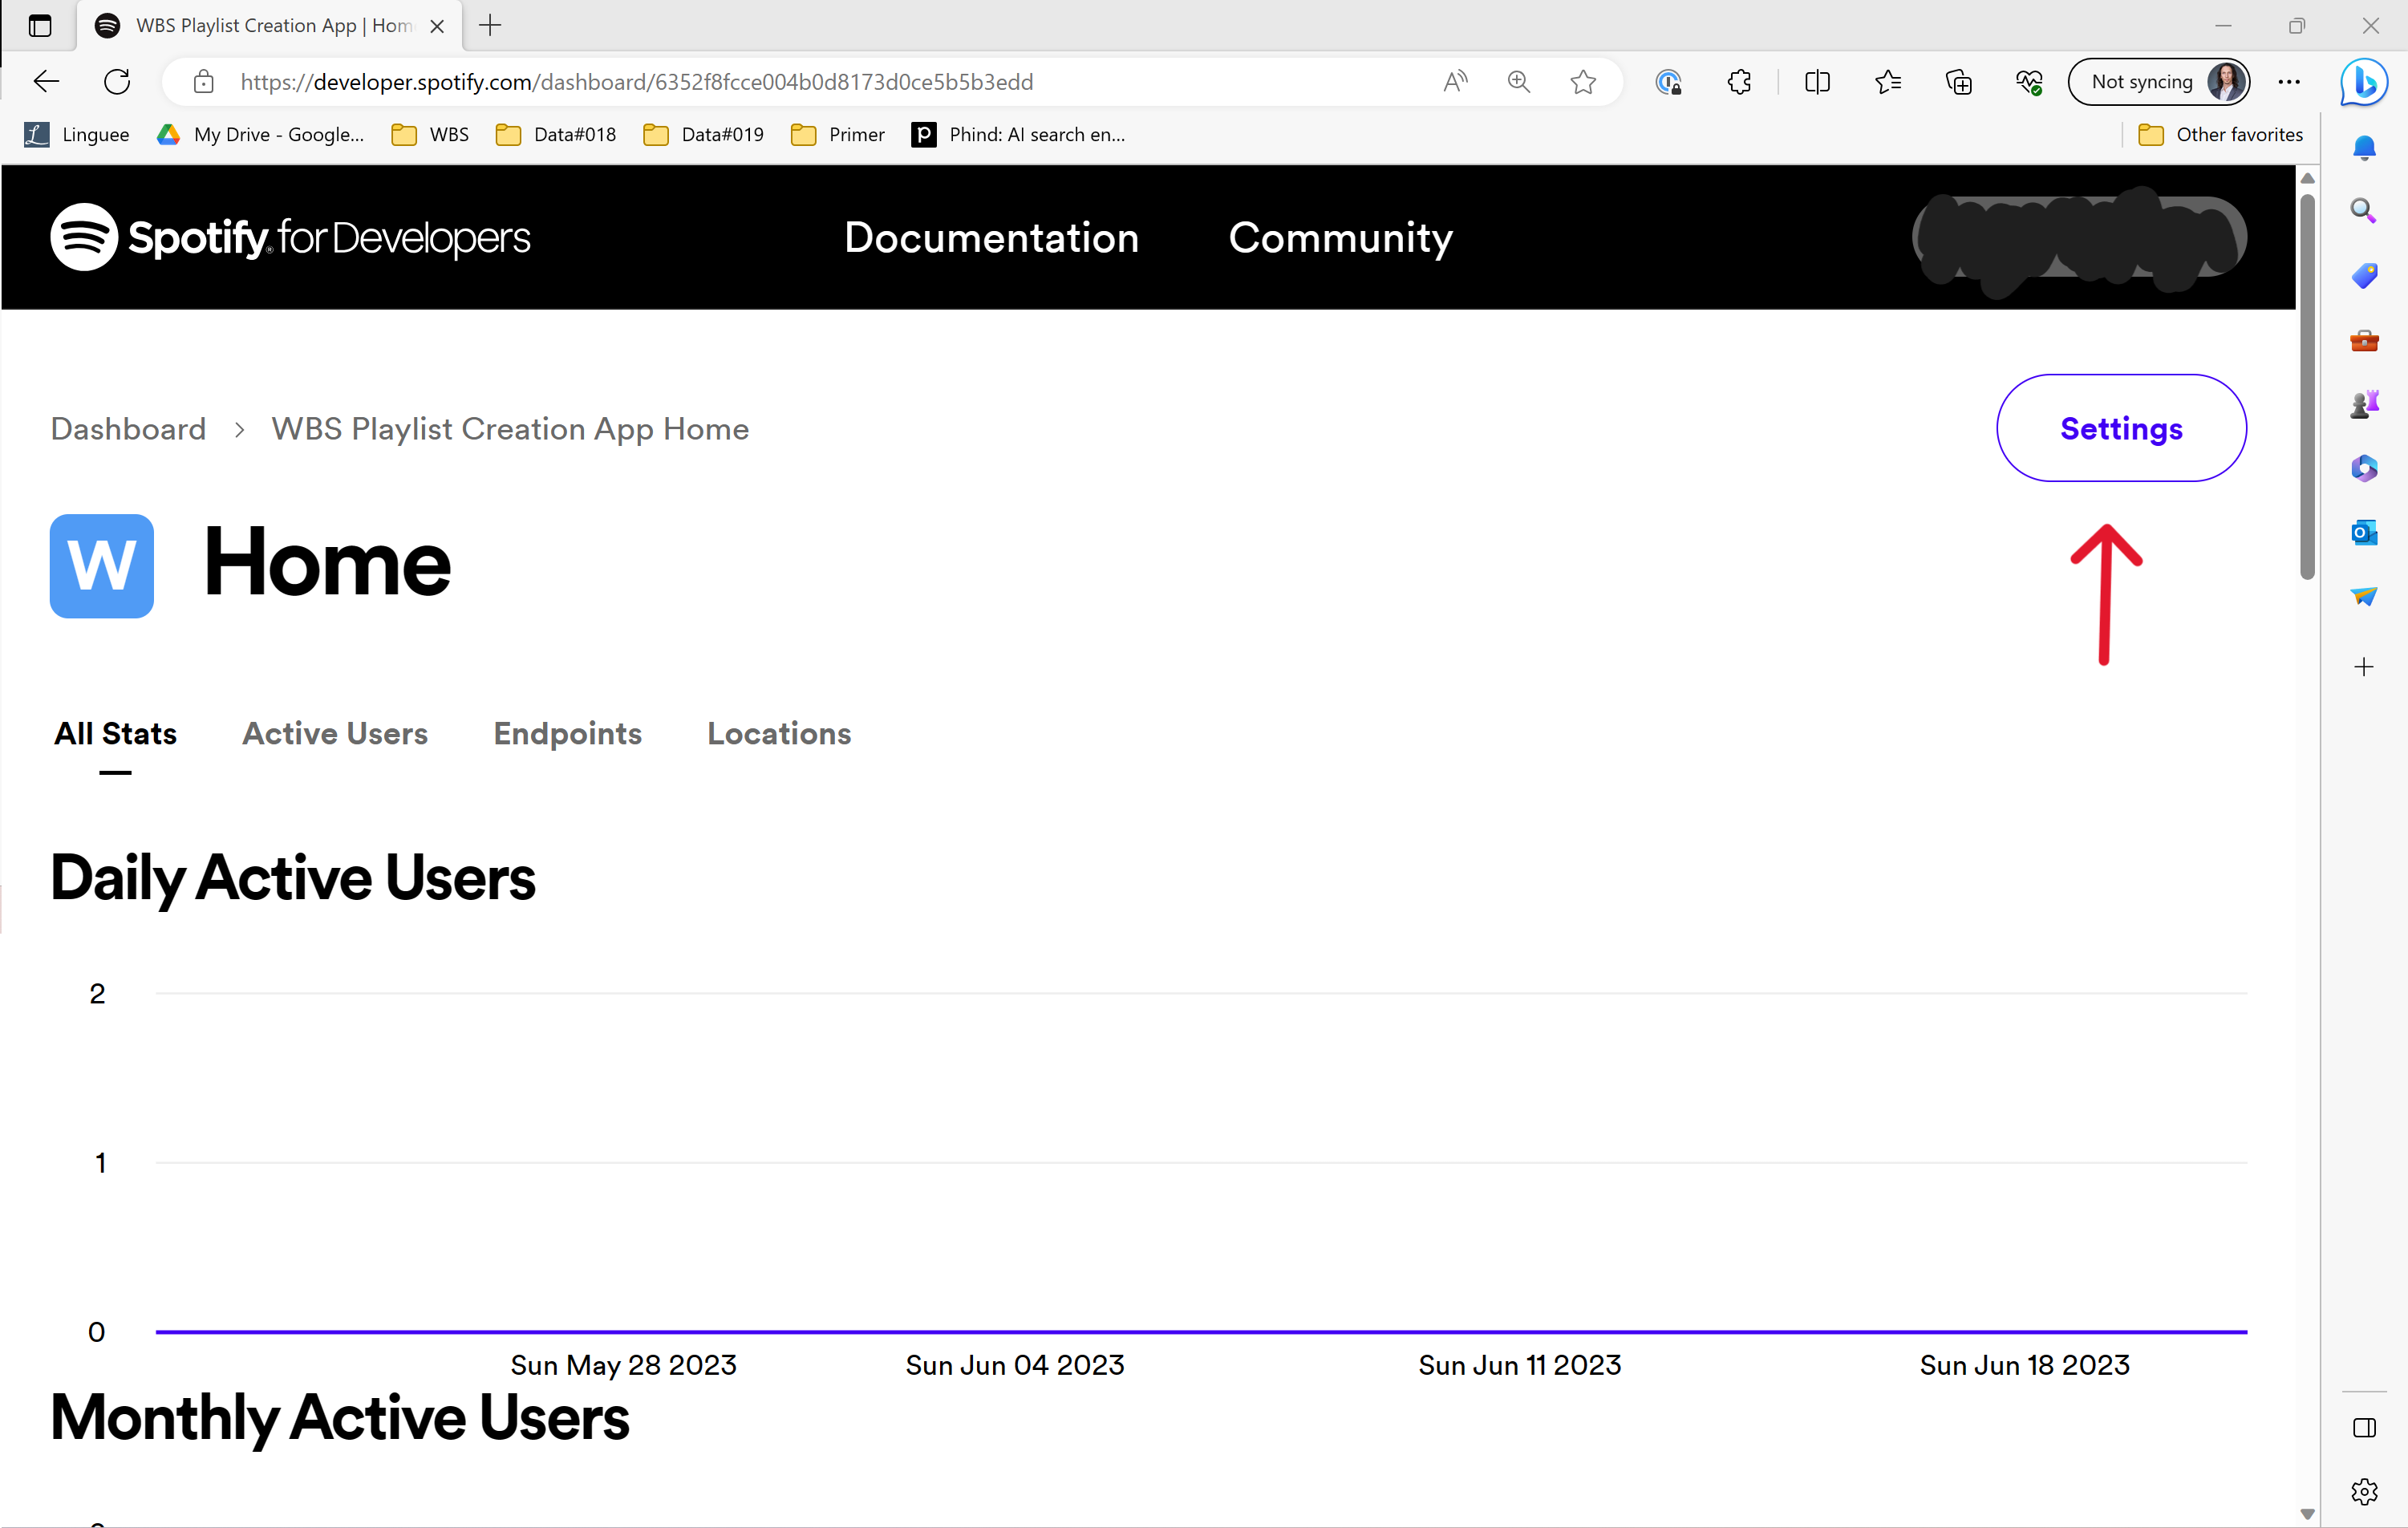

download.png

###4.3.&nbsp; Getting the Username
Finally, we navigate to [Spotify Web](https://open.spotify.com/) (not the developer site), and click the profile icon in the upper right, then "Account", follwed by "Edit profile" to **get our Username**. This may be our display name, such as wbsLovesMusic, or a random hash of letters and numbers.

With all this information saved, we're ready to post our first playlist.

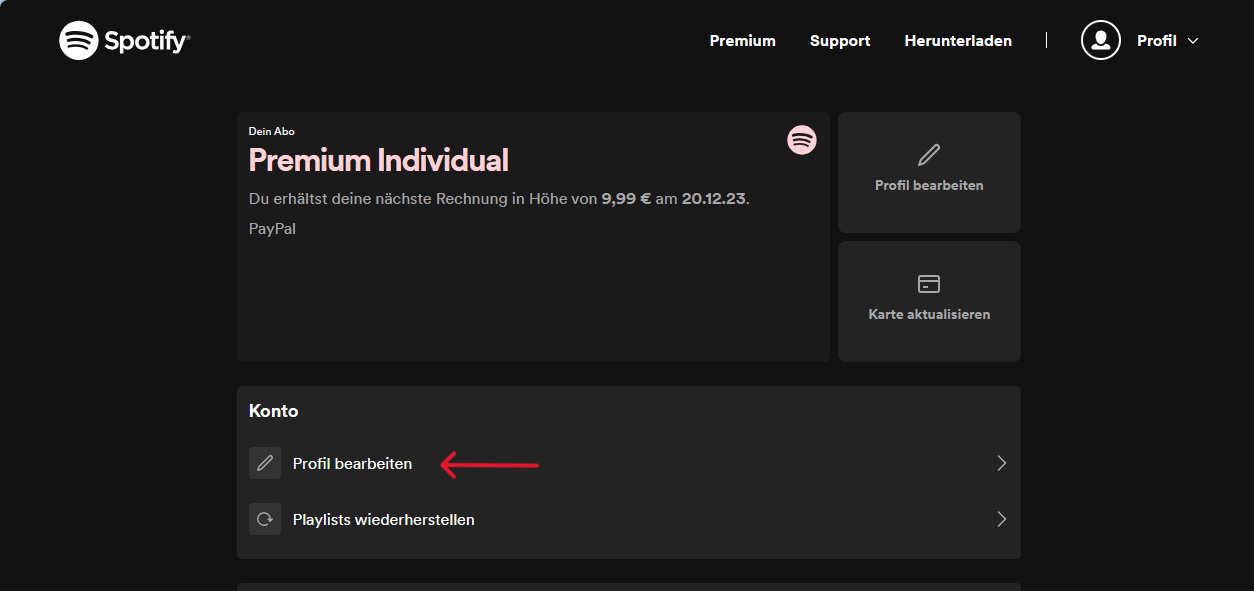

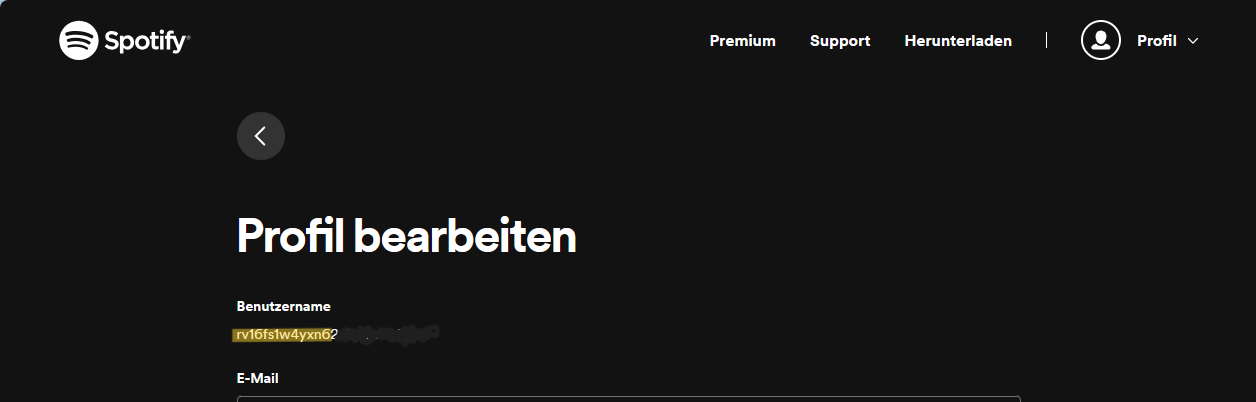

###4.4.&nbsp; Posting a playlist

In [ ]:
!pip install spotipy
# OR
# !conda install -c conda-forge spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 7.8 MB/s eta 0:00:00


In [ ]:
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
from google.colab import userdata # only in Google Colab for secret management

In [ ]:
scope = 'playlist-modify-public'
username =
redirectUri = 'http://localhost:8081/'
client_id =
client_secret =

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

Please pay attention to the comments at the bottom of the next cell. Entering the redirect URL is essential to signing in and allowing your notebook to communicate with your Spotify profile.

In [ ]:
playlist_collection = {}
for i in range(25):  # This range must match the number of clusters
    playlist_name = f'my_playlist_cluster_{i}'  # Here, we will create simple playlist names indicating which cluster created the playlist
    playlist_description= 'this is a test list'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    id_list = list(songs_df.loc[songs_df["cluster"] == i]
                            .sample(5)  # Here, we simply take 5 songs randomly from each cluster
                            .id
                   )
     # Spotify needs cetain text wrappers around ID numbers to identify the target as a track, a playlist, etc.
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
    playlist_collection[playlist_name] = playlist_id

# When this code is run, either a browser window will open, or in Google Colab a URL will appear
# This URL will ask you to sign in to Spotify
# After signing in, copy the URL you are redirected to and paste it in the box that pops up

In [ ]:
# Playlist IDs can be saved for later
with open("./playlists.pkl", "wb") as f:
    pickle.dump(playlist_collection, f)

# This step is only needed in Google Colab
from google.colab import files
files.download("./playlists.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###4.5.&nbsp; Overwriting an existing playlist
As you refine your model, you may want to repopulate your existing playlists instead of creating new ones. To do this, you'll need to save the playlist_ids you created above, either as a pickled object or by writing them to a text file.

In [ ]:
token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [ ]:
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in songs_df.sample(10).id]
playlist_id = playlist_collection["my_playlist_cluster_0"] # We now replace the 5 songs in playlist 0 with 10 different songs
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)

{'snapshot_id': 'AAAABHsp/vbJrmp34zo+CJxs5sms+vKL'}